# The IT Industry .. Income and Gender Insight into the Global Population

----------------------------
# 1 - Business Understanding

Programmers from around the world do similar things. Indeed, the software industry is one of few industries where the skill set and knowledge is very, for the lack of a better word, Standardaized. The average web developer in China is very likely to be doing the same kind of work of a developed in Canada. 

Since we have this great similarity of the work being done, it would be imperative to wounder about whether these individuals are paid equally. Moreover, it is also of interest to know if there are pay gaps, over-representation, or any other form of dissimilarity across the global programmers population.

In this article, I'll be using the StackOverflow survey of programmers from the year 2018 to investigate a couple of questions in an attempt to shed some light on these dissimilarities:

- Question 1: Assuming that Stackoverflow users are representative of the whole world population, Are there any contries over-represented or under-represented in the programmers dataset?
- Question 2: What is the gender representation in the workforce per country?
- Question 3: Can we find a correlation between countries where programmers have lower income and contries were the whole economy has a lower GDP per captial?
- Question 4: What are the most infulencial dimensions in predicting an individuals income?

--------------------------------
# 2 - Data Understanding

## 2.1 - Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# 2018 StackOverflow Survey data from StackOverflow website
# source: https://insights.stackoverflow.com/survey
survey_data = pd.read_csv('./survey_results_public.csv')
survey_schema = pd.read_csv('./survey_results_schema.csv')

# GDP per captia data from the World Bank
# source: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
gdp_per_captia_data = pd.read_csv("./API_NY_GDP_PCAP_PP_CD_DS2_en_csv_v2_247784.csv")

# Polulation per Country data from the World Bank
# source: https://data.worldbank.org/indicator/SP.POP.TOTL

population_data = pd.read_csv("./API_SP_POP_TOTL_DS2_en_csv_v2_247892.csv")

/usr/local/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2.2 - Metadata Analysis of Datasets

In [3]:
# let's take a look at the size of the dataset we are investigating
survey_data.shape

(98855, 129)

In [4]:
# we also need to understand what each dimension means in order to form some basic understanding of the data at hand
survey_schema.loc[40:129]

,Column,QuestionText
40,JobContactPriorities3,Imagine that a company wanted to contact you a...
41,JobContactPriorities4,Imagine that a company wanted to contact you a...
42,JobContactPriorities5,Imagine that a company wanted to contact you a...
43,JobEmailPriorities1,Imagine that same company decided to contact y...
44,JobEmailPriorities2,Imagine that same company decided to contact y...
45,JobEmailPriorities3,Imagine that same company decided to contact y...
46,JobEmailPriorities4,Imagine that same company decided to contact y...
47,JobEmailPriorities5,Imagine that same company decided to contact y...
48,JobEmailPriorities6,Imagine that same company decided to contact y...
49,JobEmailPriorities7,Imagine that same company decided to contact y...


In [5]:
'''
Here I am defining a function that will be used to summarize the metadata for each column in the dataset.
It will give us some insight on the number (and percentage of) missing values, number of unique values, and more.
'''
def get_columns_metadata(dataset,column_type=None,inclusive=True):
    dtype = dataset.dtypes
    nunique = dataset.nunique()
    total_count = nunique/nunique*len(dataset)
    null_count = dataset.isna().sum()
    percent_null = null_count/total_count*100
    not_null_count = total_count-null_count
    percent_not_null = not_null_count/total_count*100
    
    result = pd.concat([dtype,nunique,total_count,null_count,percent_null,not_null_count,percent_not_null],axis=1)
    result.columns = ['dtype','nunique','total_count','null_count','percent_null','not_null_count','percent_not_null']
    if column_type is None:
        pass
    else:
        if inclusive:
            result = result[result['dtype']==column_type]
        else:
            result = result[result['dtype']!=column_type]
    return result

In [6]:
columns_metadata = get_columns_metadata(survey_data)
columns_metadata.sort_values(by='percent_null',ascending=False)

,dtype,nunique,total_count,null_count,percent_null,not_null_count,percent_not_null
TimeAfterBootcamp,object,8,98855.0,92203,93.270952,6652.0,6.729048
MilitaryUS,object,2,98855.0,83074,84.036215,15781.0,15.963785
HackathonReasons,object,127,98855.0,73164,74.011431,25691.0,25.988569
ErgonomicDevices,object,15,98855.0,64797,65.547519,34058.0,34.452481
AdBlockerReasons,object,63,98855.0,61110,61.817814,37745.0,38.182186
StackOverflowJobsRecommend,object,11,98855.0,60538,61.239189,38317.0,38.760811
JobEmailPriorities3,float64,7,98855.0,52642,53.251732,46213.0,46.748268
JobEmailPriorities1,float64,7,98855.0,52642,53.251732,46213.0,46.748268
JobEmailPriorities2,float64,7,98855.0,52642,53.251732,46213.0,46.748268
JobEmailPriorities7,float64,7,98855.0,52642,53.251732,46213.0,46.748268


As per the metadata above, there seems to be a lot of missing data in the dataset. Only 9 out of the 129 columns in the dataset have more than 90% of their data. The other columns are missing a lot. This essentially means that we will have to consider truncating the rows that have a high number of missing data in order to get the good chunk of data that we can analyze.

Another thing to note here is the abundance of columns in the dataset that have +100 unique values while being of type object. if these are categorical columns, they shouldn't have that many unique values. Let's peek into them to see what's going on.

In [7]:
survey_data['DevType'].unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

As shown above, these object type columns contain semicolon seperated values in the form of tags. We can assume each of these tags to be its own categorical feature. This will require a custom function to parse these tags and build the required columns accordingly.

-----------------------------------------
# 3 - Data Preparation

## 3.1 - Mapping Country Column across the three datasets and merging them into one dataset

Since the data from the StackOverflow survey has a Country column filled with strings of non-standard country names, we certainly cannot just match it to the World Bank datasets for Population and GDP per Capita. Accordingly, I made a custom mapping in order to Unify the country names such that we can later join them and analyze them with ease.

With that in mind, certainly, some of survey data will be lost as one country might be shown in the survey while it lacks data in the World Bank dataset, and vice versa. This reduction in the dataset should not concerning due to the fact that these missing countries are not significant in the datasets; this is actually way they are missing in the first place.

In [8]:
def drop_rows_with_missing_values(dataset,cols):
    count_rows_dropped = 0
    original_size = len(dataset)
    for col in cols:
        count_rows_dropped+=dataset[col].isna().sum()
        dataset = dataset[~dataset[col].isna()]
    dropped_percent = count_rows_dropped/original_size*100
    
    metadata = {
        'original_size':original_size,
        'count_rows_dropped':count_rows_dropped,
        'new_size':len(dataset),
        'dropped_percent':dropped_percent
    }
    return dataset,metadata

In [9]:
country_mapping = pd.read_csv("./Country_Names_map.csv")

In [10]:
# mapping survey data to a new country column and dropping the old column

survey_data_country_mapped = pd.merge(survey_data,country_mapping, how='left', left_on='Country', right_on='Country')
survey_data_country_mapped = survey_data_country_mapped.drop(['Country'],axis=1)
survey_data_country_mapped['Country'] = survey_data_country_mapped['Country_Target']
survey_data_country_mapped = survey_data_country_mapped.drop(['Country_Target'],axis=1)
survey_data = survey_data_country_mapped

In [11]:
# Mapping population data to the new country column and dropping the old column
# Also dropping countries that are not available in the standard mapping

population_data_country_mapped = pd.merge(population_data,country_mapping, how='left', left_on='Country Name', right_on='Country')
population_data_country_mapped = population_data_country_mapped.drop(['Country Name','Country'],axis=1)
population_data_country_mapped['Country'] = population_data_country_mapped['Country_Target']
population_data_country_mapped = population_data_country_mapped.drop(['Country_Target'],axis=1)
population_data_country_mapped,metadata_drop = drop_rows_with_missing_values(population_data_country_mapped,['Country','2018'])
population_data = population_data_country_mapped

In [12]:
# Mapping GDP per Capita data to the new country column and dropping the old column
# Also dropping countries that are not available in the standard mapping

gdp_per_captia_data_country_mapped = pd.merge(gdp_per_captia_data,country_mapping, how='left', left_on='Country Name', right_on='Country')
gdp_per_captia_data_country_mapped = gdp_per_captia_data_country_mapped.drop(['Country Name','Country'],axis=1)
gdp_per_captia_data_country_mapped['Country'] = gdp_per_captia_data_country_mapped['Country_Target']
gdp_per_captia_data_country_mapped = gdp_per_captia_data_country_mapped.drop(['Country_Target'],axis=1)
gdp_per_captia_data_country_mapped,metadata_drop = drop_rows_with_missing_values(gdp_per_captia_data_country_mapped,['Country','2018'])
gdp_per_captia_data = gdp_per_captia_data_country_mapped

In [13]:
# We are interested in 2018 population data, we should ignore the rest
population_data = population_data.loc[:,['Country','2018']]

# Renaming the columns to cleaner names
population_data.columns = ['Country','Population_2018']

In [14]:
# We are interested in 2018 GDP per Capita data, we should ignore the rest
gdp_per_captia_data = gdp_per_captia_data.loc[:,['Country','2018']]

# Renaming the columns to cleaner names
gdp_per_captia_data.columns = ['Country','GDP_per_Capita_2018']

In [15]:
# joining the datasets on Country column. This new dataset will be the dataset on which analysis will take place
survey_data_extended1 = pd.merge(survey_data,population_data, how='left', left_on='Country', right_on='Country')
survey_data_extended2 = pd.merge(survey_data_extended1,gdp_per_captia_data, how='left', left_on='Country', right_on='Country')
survey_data = survey_data_extended2

-------------------------

## 3.2 - Data Preparation

### 3.2.1 - Prepare data for Question 1
- Question 1: Assuming that Stackoverflow users are representative of the whole world population, Are there any contries over-represented or under-represented in the programmers dataset?

In [16]:
'''
Since respondents who did not specify a country of origin cannot be used in the analysis, we will have
to drop their responses from our dataset.
'''
Q1_dataset,Q1_metadata = drop_rows_with_missing_values(survey_data[['Country','Population_2018']],['Country'])

In [17]:
Q1_metadata['dropped_percent']

0.7698143745890446

Thankfully, more than 99.2% of the values in this column are actually available. Hence, Row-Wise truncation will be sufficient to prepare the data for this question.

Q1 dataset is now ready for analysis.

## 3.2 - Prepare data for Question 2
- Question 2: What is the gender representation in the workforce per country?

In [18]:
columns_metadata.loc['Gender','percent_null']

34.784280006069494

Oops .. 34% of the gender data is missing in our dataset. Since there is not logical way to impute these missing values. We should just drop them while making the assumption that the remaining values are still representative of the gender distributions across countries.

In [19]:
Q2_dataset,Q2_metadata = drop_rows_with_missing_values(survey_data[['Country','Gender']],['Country','Gender'])

In [20]:
Q2_metadata['dropped_percent']

34.97243437357746

A more advanced way of handling these missing values is to use Model-Based imputation where all of the other columns in the dataset are used in a predictive model to try and predict the missing values for the Gender variable. Despite this being a very valid option, I will choose not to do it just to keep this exercise simple.

Before we march in with data analysis, let's take a look at the different values the gender column might have.

In [21]:
def summarize_categorical_column(dataset,summarize_column,split_values,group_by_column,show_others=True,show_nan=True):
    total_count_by_group = dataset.groupby([group_by_column])[group_by_column,summarize_column].size()
    result = pd.DataFrame(total_count_by_group)
    result.columns = ['Total_Count']
    
    for val in split_values:
        temp = dataset[dataset[summarize_column]==val].groupby([group_by_column]).size()
        result[val] = temp
    if show_others:
        temp = dataset[~dataset[summarize_column].isin(split_values)&~dataset[summarize_column].isna()].groupby([group_by_column]).size()
        result['Others'] = temp
    if show_nan:
        temp = dataset[dataset[summarize_column].isna()].groupby([group_by_column]).size()
        result['NaN'] = temp
    result = result.fillna(0)
    
    return result


In [22]:
gender_counts = summarize_categorical_column(survey_data,'Gender',['Male','Female'],"Country",True,False)[['Male','Female','Others']].sum()
gender_counts/gender_counts.sum()*100

Male      92.246784
Female     6.228707
Others     1.524509
dtype: float64

In [23]:
survey_data.nunique()['Gender']

15

In [24]:
survey_data['Gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

As shown above, only 1.5% of the available data is for gender types other than Male and Female. Since these Other types (additional 13) will further fractunate the 1.5% to smaller numbers, it's reasonable to exclude them from the analysis.

Q2 dataset is now ready for analysis.

## 3.3 - Prepare data for Question 3
- Question 3: What are the most infulencial dimensions in predicting an individuals income?

To answer this question, we need to build a full predictive model that uses whatever data we have in order to predict the respondents' income. However, before we jump to building the predictive model, we need to clean our data first.

### 3.3.1 - Dropping rows missing target column

In order for us to build a predictive model on the ConvertedSalary field, we need to have this field available in our dataset for the surpervised training to work. Accordinly, we must drop all rows with the ConvertedSalary value missing.

In [25]:
Q3_dataset,Q3_metadata = drop_rows_with_missing_values(survey_data,['ConvertedSalary'])

In [26]:
Q3_metadata['dropped_percent']

51.74548581255374

Clearly, this is a substantial part of our dataset. However, we cannot impute the missing values with mean, median, or mod values as such imputation will skew the data and give us biased results. We can, however, after building our predictive model for the ConvertedSalary field, we can use this model to predict proper imputations for the missing values if we need to do further analysis on the dataset.

There are other fields in our dataset that are not supposed to be passed to the predictive model training routine. For example, the Salary field is nothing but another value for a respondent's income. Accordinly, it should be dropped.

In [27]:
Q3_dataset = Q3_dataset.drop(['Salary','Respondent'],axis=1)

### 3.3.2 - Dropping outlier rows and columns

As we are going to pass our data to a model that does not expect nan values, we need to trim our data such that the number of missing values for the columns and the rows is minimized. Once that takes place, we can then impute the remaining rows and columns before passing the data to the predictive model.

In [28]:
columns_missing_data = get_columns_metadata(Q3_dataset).sort_values(by="percent_null",ascending=False)['percent_null']

In [29]:
import matplotlib.pyplot as plt

def plot_missing_data_distribution(missing_values_series,data_type):
    %matplotlib inline
    fig = plt.figure(figsize=(10,5))
    plt.hist(missing_values_series.values,100)
    plt.ylabel("Number of "+data_type);
    plt.xlabel("Percentage of NaN Values");
    plt.xticks(np.arange(0, 101, step=5),rotation='vertical',fontsize=10)
    plt.grid();

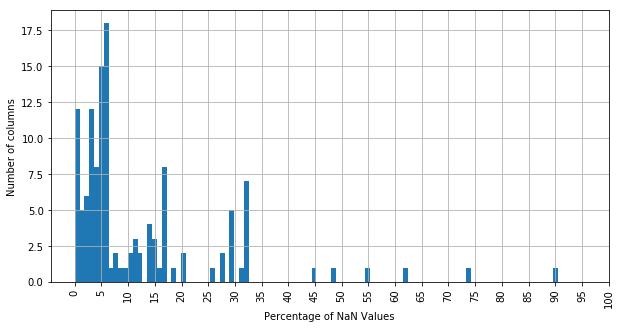

In [30]:
# Investigate patterns in the amount of missing data in each column.
plot_missing_data_distribution(columns_missing_data,data_type="columns")

Clearly, most of our columns lay below the 35% missing data threshold. Only 6 columns are outliers as they ar missing 43% of their data or more. Therefore, we will all columns missing more that 35% of their data.

In [31]:
columns_missing_a_little = columns_missing_data[columns_missing_data<=35]
columns_missing_a_lot = columns_missing_data[columns_missing_data>35]

In [32]:
print(f"{columns_missing_a_little.shape[0]} ({columns_missing_a_little.shape[0]/Q3_dataset.shape[1]*100}%) columns are missing less than or equal to 35% of their data")
print(f"{columns_missing_a_lot.shape[0]} ({columns_missing_a_lot.shape[0]/Q3_dataset.shape[1]*100}%) columns are missing more than 35% of their data")

123 (95.34883720930233%) columns are missing less than or equal to 35% of their data
6 (4.651162790697675%) columns are missing more than 35% of their data


In [33]:
Q3_dataset = Q3_dataset.drop(columns_missing_a_lot.index.values,axis=1)

After dropping outlier columns, it's time now to drop outlier rows.
Let's look at the distribution of rows missing data.

In [34]:
def get_rows_missing_values_summary(dataset):
    result = dataset.isna().sum(axis=1)/dataset.shape[1]*100
    result = result.sort_values(ascending=False)
    return result

In [35]:
rows_missing_data = get_rows_missing_values_summary(Q3_dataset)

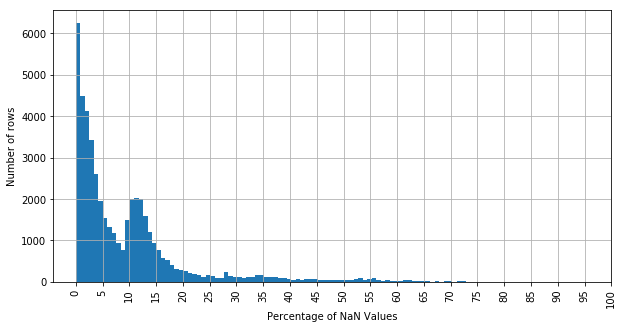

In [36]:
plot_missing_data_distribution(rows_missing_data,data_type="rows")

As shown in the distribution plot, the 20% mark is perfect spot to trim the data. Any rows missing more than 20% of their data should be considered ourliers, and should be dropped.

In [37]:
missing_a_little = rows_missing_data[rows_missing_data<=20]
missing_a_lot = rows_missing_data[rows_missing_data>20]

In [38]:
print(f"{missing_a_little.shape[0]} ({missing_a_little.shape[0]/Q3_dataset.shape[0]*100}%) rows are missing less than or equal to 20% of their data")
print(f"{missing_a_lot.shape[0]} ({missing_a_lot.shape[0]/Q3_dataset.shape[0]*100}%) rows are missing more than 20% of their data")

42698 (89.50987379984068%) rows are missing less than or equal to 20% of their data
5004 (10.490126200159322%) rows are missing more than 20% of their data


In [39]:
# dropping rows that are missing a lot of their data
Q3_dataset = Q3_dataset.loc[missing_a_little.index,:]

### 3.3.3 - One-hot encode categorical and multi-valued columns

In order to handle the multi-valued (semicolon seperated values) columns, we need to be build a custom function that parses these values into seperate columns. The functions below do exactly that.

In [40]:
def get_distinct_values_for_mixed_column(dataset,column):
    all_distinct_values = []
    distinct_values = dataset[column].unique()
    for value in distinct_values:
        try:
            parts = value.split(";")
            all_distinct_values.extend(parts)
        except:
          pass
    duplicates_removed = set(all_distinct_values)
    duplicates_removed = list(duplicates_removed)
    return duplicates_removed
        

In [41]:
def one_hot_encode_multi_value_column(dataset,column):
    #print("column: "+column)
    distinct_values = get_distinct_values_for_mixed_column(dataset,column)
    for val in distinct_values:
        #print('value: '+val)
        dataset[column+'_'+val] = dataset[column].str.find(val)!=-1
        dataset[column+'_'+val] = dataset[column+'_'+val].astype(int)
    dataset = dataset.drop(column,axis=1)
    return dataset

In [42]:
def one_hot_encode_multivalue_columns(dataset,columns):
    for col in columns:
        dataset = one_hot_encode_multi_value_column(dataset,col)
    return dataset

I'll make a risky assumption here and take all object-typed columns as categorical columns. Of course, this is not an accurate thing to do as many of these fields are expected to be ordinal in nature. However, to keep this exercise simple, let's make this rediculous assumption and proceed.

In [43]:
categorical_columns = get_columns_metadata(Q3_dataset,'object')['dtype'].index.values

In [44]:
Q3_dataset_encoded = one_hot_encode_multivalue_columns(Q3_dataset,categorical_columns)

Cool .. our data is now one-hot encoded and all our variable are now numerical.

### 3.3.4 - Imputation, Scaling, and train-test data splits

We still have some NaN values in our reduced dataset. It's time now to impute these values with a simple imputer. Note that in a real-life scenario, imputation must be done carefully in a way that suits every single column. Instead, I will go ahead and impute all of my data with the "Most Frequent" value strategy.

In [45]:
from sklearn.preprocessing import Imputer
dataImputer = Imputer(missing_values=np.nan, strategy='most_frequent',axis=0)
Q3_dataset_imputed = dataImputer.fit_transform(Q3_dataset_encoded)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


For the Regression model to work properly, we also need to scale all of our data such that we remove the biases in values. The easiest way to do that is to use Sci-kit Learn Standard Scaler.

In [46]:
from sklearn.preprocessing import StandardScaler
dataScaler = StandardScaler()
Q3_dataset_scaled = dataScaler.fit_transform(Q3_dataset_imputed)

In [47]:
Q3_dataset_scaled = pd.DataFrame(Q3_dataset_scaled)
Q3_dataset_scaled.columns = Q3_dataset_encoded.columns
Q3_dataset_scaled.index = Q3_dataset_encoded.index

In [48]:
Q3_y = Q3_dataset_scaled['ConvertedSalary']

In [49]:
Q3_X = Q3_dataset_scaled.drop(['ConvertedSalary'],axis=1)

Fantastic ... our data is ready for the regression model now. 

## 3.4 - Prepare data for Question 4
- Question 4: Can we find a correlation between countries where programmers have lower income and contries were the whole economy has a lower GDP per captial?

This question only requires two fields to be answered (namely, Country and ConvertedSalary). Accordinly, all rows missing one of these two should be dropped.

One might suggest using our predictive model from Question 3 to predict and impute values for the ConvertedSalary field. This is a legitimate option. However, to keep this exercise simple, let's just drop the rows with the missing values.

In [50]:
columns_metadata.loc['ConvertedSalary','percent_null']

51.74548581255374

In [51]:
Q4_dataset,Q4_metadata = drop_rows_with_missing_values(survey_data[['Country','ConvertedSalary']],['Country','ConvertedSalary'])

In [52]:
Q4_metadata['dropped_percent']

51.88204946639017

Bingo ... data for Question 4 is ready now.

------------------------------
# 4 - Data Modeling

## 4.1 Run a Random Forest Regressor to find the most influencial features predicting individuals' income

In order to answer question 3, we need a predictive model for the ConvertedSalary target field. Here, I choose to use a Random Forest Regressor since it's easy to set us and requires little to no tuning.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Q3_X, Q3_y, test_size=0.20, random_state=42)

In [55]:
regressor = RandomForestRegressor(n_estimators=100)

In [56]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [58]:
from sklearn import metrics
print(metrics.mean_squared_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))

0.07370584836412335
0.5138645938052707


In [59]:
important_features = pd.Series(data=regressor.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)

Good ... now we can proceed to the analysis and results

----------------------------
# 5 - Results

## 5.1 - Does the Survery data have over-represented or under-represented countries?

In [60]:
Q1_stats = Q1_dataset.groupby('Country')['Population_2018'].agg(['count','mean'])
Q1_stats = Q1_stats.sort_values(by='count',ascending=False)
Q1_stats.columns = ['NumberOfResponses','Population']

In [61]:
Q1_stats['NoR_percent'] = Q1_stats['NumberOfResponses']/len(Q1_dataset)*100
Q1_stats['Population_percent'] = Q1_stats['Population']/len(Q1_dataset)*100

In [62]:
count_rows_by_country_percent_others = Q1_stats[0:15]['NoR_percent']

In [63]:
count_rows_by_country_percent_others['Others'] = 100-count_rows_by_country_percent_others.sum()

/usr/local/anaconda/lib/python3.7/site-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/usr/local/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
def plot_pie_chart(series,title):
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    ax1.pie(series.values, labels=series.index.values, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title(title,y=1.03,bbox={'facecolor':'0.8', 'pad':5})
    plt.show();

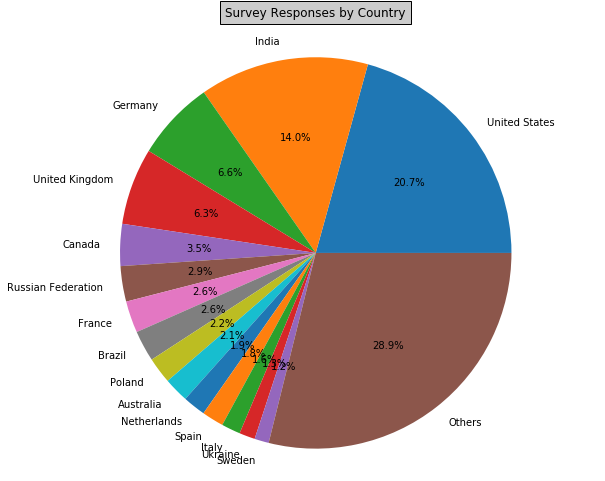

In [65]:
plot_pie_chart(count_rows_by_country_percent_others,"Survey Responses by Country")

From the pie chart above, the top 15 countries represented in the StackOverflow survery account for 70% of the survey responses. In the remainder of the analysis, we will focus on the these top 15 countries for the following reason.

In [66]:
Q1_stats_top15 = Q1_stats[0:15]

In [67]:
Q1_stats_top15['NoR_percent_to_subset'] = Q1_stats_top15['NumberOfResponses']/Q1_stats_top15['NumberOfResponses'].sum()*100
Q1_stats_top15['population_percent_to_subset'] = Q1_stats_top15['Population']/Q1_stats_top15['Population'].sum()*100

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


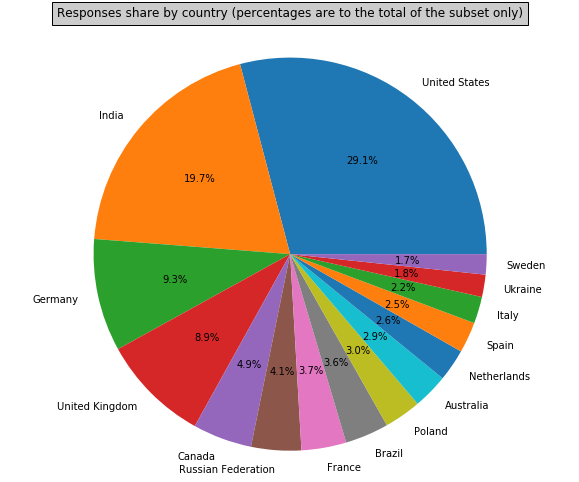

In [68]:
plot_pie_chart(Q1_stats_top15['NoR_percent_to_subset'],"Responses share by country (percentages are to the total of the subset only)")

In [85]:
pd.DataFrame(Q1_stats_top15['Population'])

,Population
Country,
United States,3.271674e+08
India,1.352617e+09
Germany,8.292792e+07
United Kingdom,6.648899e+07
Canada,3.705886e+07
Russian Federation,1.444780e+08
France,6.698724e+07
Brazil,2.094693e+08
Poland,3.797855e+07


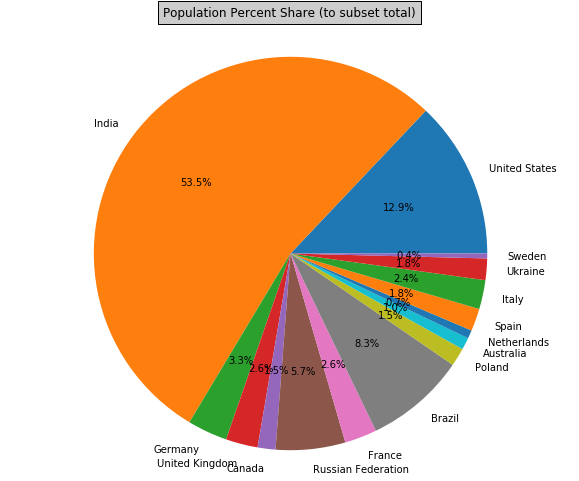

In [69]:
plot_pie_chart(Q1_stats_top15['population_percent_to_subset'],"Population Percent Share (to subset total)")

In [70]:
representation_ratio_in_subset = Q1_stats_top15['NumberOfResponses']/Q1_stats_top15['Population']
representation_ratio_in_subset = representation_ratio_in_subset.sort_values(ascending=False)

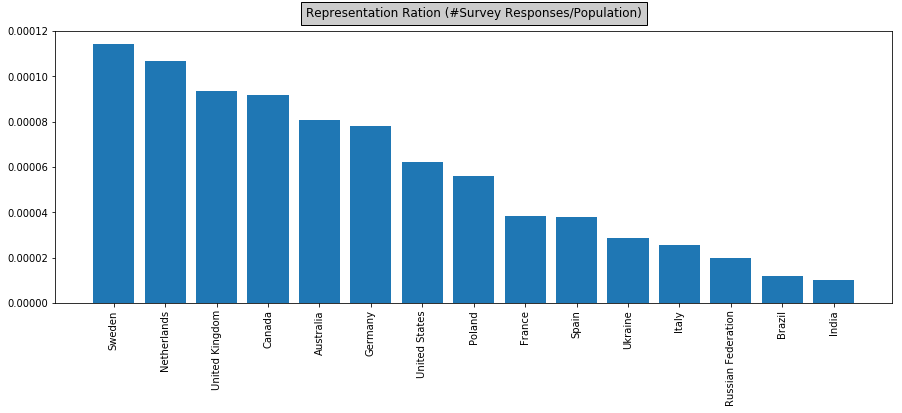

In [86]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
ax1.bar(representation_ratio_in_subset.index.values,representation_ratio_in_subset.values)
plt.xticks(rotation='vertical')
plt.title("Representation Ration (#Survey Responses/Population)",y=1.03,bbox={'facecolor':'0.8', 'pad':5})

plt.show()

### Analysis

- It's noted that countries where English is a native language have a higher representation in the Survey date.
- Moreover, this also holds true for countries in Europe / Westren Europe.
- It is surprising that countries like Japan, China, and South Korea (which are amonge the top economies of the world) are not even amoung the top 15 countries of the survey despite their florishing IT industries.
- One explaination for the under-representation is the language barreier which can serve for the minimal function of inspecting code and error messages in a useful way, but is not sufficient for StackOverflow contributions both in terms of posts or reponses to surveys.
- Moreover, there could be some alternatives for StackOverflow in the native languages of the programmers of the under-represented countries which could be the reason why major economies such as Japan, China, and South Korea are under-represented.

## 5.2 - What is the gender representation in the workforce per country?

In [72]:
country_gender_data = summarize_categorical_column(Q2_dataset,'Gender',['Male','Female'],"Country")

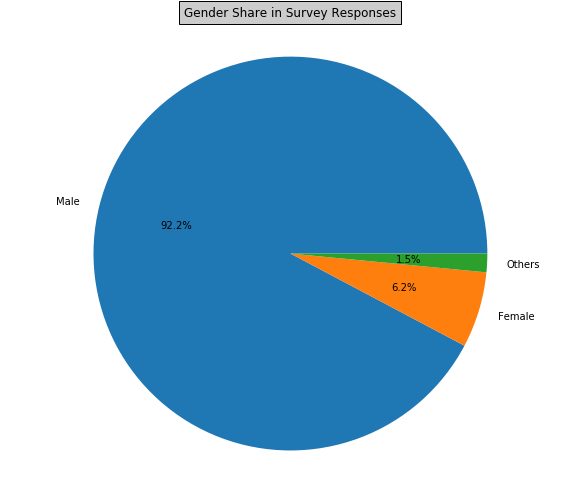

In [87]:
plot_pie_chart(country_gender_data.loc[:,['Male','Female','Others']].sum(),"Gender Share in Survey Responses")

In [74]:
gender_count_top15_countries = country_gender_data.loc[Q1_stats_top15.index.values,:]

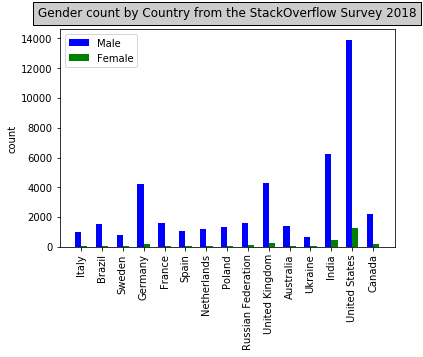

In [88]:
import matplotlib.pyplot as plt
import numpy as np

a = gender_count_top15_countries['Male'].values
b = gender_count_top15_countries['Female'].values
x = np.arange(len(gender_count_top15_countries.index.values))
ax1 = plt.subplot(1,1,1)
w = 0.3


#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, gender_count_top15_countries.index.values, rotation='vertical')
pop =ax1.bar(x, a, width=w, color='b', align='center')

#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
#ax2 = ax1.twinx()

#We have calculated GDP by dividing gdpPerCapita to population.
gdp =ax1.bar(x + w, b, width=w,color='g',align='center')

plt.ylabel('count')

#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],['Male', 'Female'])
plt.title("Gender count by Country from the StackOverflow Survey 2018",y=1.03,bbox={'facecolor':'0.8', 'pad':5})

#To show the plot finally we have used plt.show().
plt.show()

In [76]:
gender_count_top15_countries['Male/Female Ratio'] = gender_count_top15_countries['Male']/gender_count_top15_countries['Female']

In [77]:
gender_count_top15_countries = gender_count_top15_countries.sort_values(by=["Male/Female Ratio"],ascending=False)

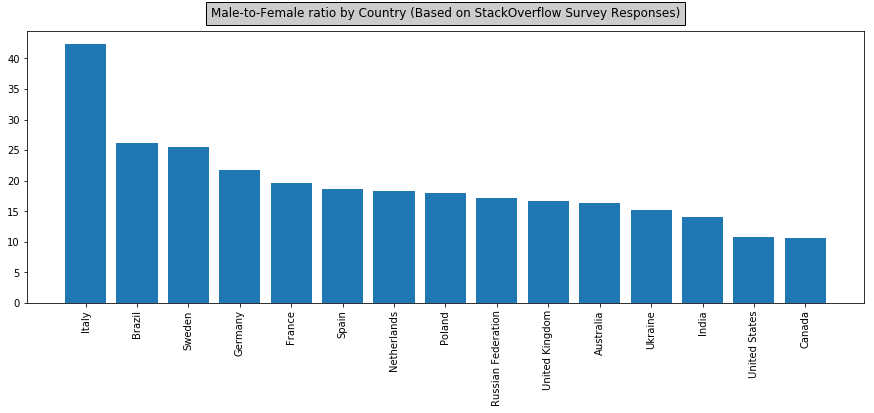

In [90]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
ax1.bar(gender_count_top15_countries.index.values,gender_count_top15_countries['Male/Female Ratio'].values)
plt.xticks(rotation='vertical')
plt.title("Male-to-Female ratio by Country (Based on StackOverflow Survey Responses)",y=1.03,bbox={'facecolor':'0.8', 'pad':5})


plt.show()

### Analysis
- It's quite obvious that Males are far more over-represented in the IT industry compared to Females (or any other Gender for that matter).
- Countrary to intuition, some European countries (e.g. Italy, Sweden, Germany, France), which are expected to be more egalitarian compared to their Eastern counterparts, actually have a higher ratio of male to female employees.
- Countries such as India for example, which is expected to be less egalitarian than it's Europena counter parts, seems to have a lower ratio of male-to-female in the IT industry.

## 5.3 - Can we find a correlation between countries where programmers have lower income and countries were the whole economy has a lower GDP per captial?

In [79]:
Converted_Salary_by_country = Q3_dataset.groupby(['Country'])[['Country','ConvertedSalary','GDP_per_Capita_2018']].mean()

It's important to note that I performed no imputation here because it will necessarily impact the mean and distribution of the values. Accordingly, I decided to calculate some simple statistics on the available data with no imputations.

In [80]:
Converted_Salary_by_country_top15 = Converted_Salary_by_country.loc[Q1_stats_top15.index.values,:]
Converted_Salary_by_country_top15=Converted_Salary_by_country_top15.sort_values(by="ConvertedSalary",ascending=False)

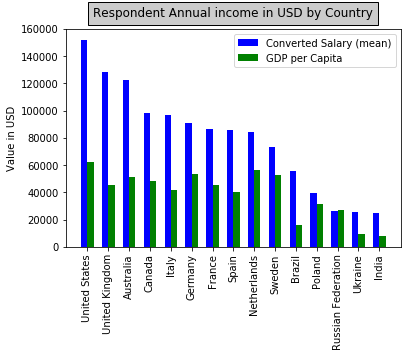

In [92]:
import matplotlib.pyplot as plt
import numpy as np

a = Converted_Salary_by_country_top15['ConvertedSalary'].values
b = Converted_Salary_by_country_top15['GDP_per_Capita_2018'].values
x = np.arange(len(Converted_Salary_by_country_top15.index.values))
ax1 = plt.subplot(1,1,1)
w = 0.3


#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, Converted_Salary_by_country_top15.index.values, rotation='vertical')
pop =ax1.bar(x, a, width=w, color='b', align='center')

#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
#ax2 = ax1.twinx()

#We have calculated GDP by dividing gdpPerCapita to population.
gdp =ax1.bar(x + w, b, width=w,color='g',align='center')

plt.ylabel('Value in USD')

#To set the legend on the plot we have used plt.legend()
plt.legend([pop, gdp],['Converted Salary (mean)', 'GDP per Capita'])
plt.title("Respondent Annual income in USD by Country",y=1.03,bbox={'facecolor':'0.8', 'pad':5})

#To show the plot finally we have used plt.show().
plt.show()

### Analysis
- Despite that countries with lower GDP per Capita have lower programmer incomes, GDP per capita does not seem to serve as a good perdictor of individuals' income.
- It is surprizing to see that the mean programmer income in Russia has a lower value compared to the GDP per Captia.
    - This can be due to inaccuracy in data gathering.
    - Another explaination is a missing aspect of taxation that was not considered. For example, if the country has higher taxation and bigger role in Wellfare programms, the final taxed income might shrink in value.
    - A third explaination is the possibility of an excess of the programmers supply leading to incomes below the GDP per capita.

## 5.4 - What are the most infulencial dimensions in predicting an individuals income?

In [82]:
important_features

Employment_Employed full-time    1.055692e-01
Country_United States            9.267441e-02
SalaryType_Yearly                6.078668e-02
GDP_per_Capita_2018              4.282363e-02
SalaryType_Monthly               3.576501e-02
Population_2018                  3.494155e-02
CurrencySymbol_GBP               1.478685e-02
YearsCodingProf_0-2 years        1.463944e-02
DevType_Student                  1.296580e-02
Country_United Kingdom           1.214124e-02
Country_Canada                   7.526113e-03
AssessBenefits8                  7.335879e-03
AssessBenefits4                  6.636468e-03
AssessBenefits3                  6.467504e-03
Age_18 - 24 years old            6.348436e-03
JobEmailPriorities5              6.085571e-03
CurrencySymbol_AUD               5.640801e-03
YearsCodingProf_3-5 years        5.474119e-03
AssessBenefits10                 5.424212e-03
AssessBenefits5                  5.368756e-03
AssessBenefits2                  5.325618e-03
AssessJob6                       5

Text(0.5, 1.0, 'Feature importance')

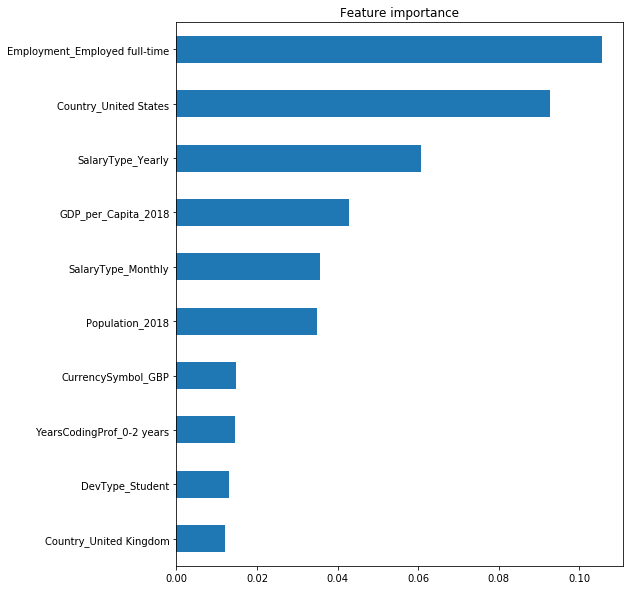

In [96]:
imp_coef = important_features[0:10]
imp_coef = imp_coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance")

### Analysis

- Surprise surprise, having a full-time job is the most significant predictor of income. However, this goes without saying. A jobless person definately makes less than one with a job.
- The second most important feature to predict an individual's income is whether that individual is working in the U.S. or not. Considering the fact that a signigicant proportion of the survey data we have at hand is from the U.S., there is a chance that the model has overfit that variable.
- The third most significant factor in predicting an individual's income is the Salary Type being Annual as opposed to the other types. It's important to note that an individual might tend to overlook yearly allowances and ponuses when reporting his/her monthly or weekly pay. Therefore, the survey might probably need to take that kind of bias in future iterations.
- The fourth most important factor in predicting individual's income is the GDP per Capita. This is a very predictable outcome as lower GDP per Capita usually is correlated with lower exchange rates leading to inaccurate representation of income. I would very much re-calibrate my data (if further analysis to be done) to represent the Purchasing Power Parity (PPP for short) before predicting Annual Salary. Moreover, comparing annual incomes directly without considering the role of Social Insurance and taxation aspects, might also lead to biases in the income data that distort an accurate representation of the relative standard of living of the individuals in question.

-------------------------